In [1]:
# prompt: read fraud.csv from runtime

import pandas as pd
# Assuming fraud.csv is in the current working directory
try:
  df = pd.read_csv('fraud.csv')
  print(df.head()) # Print first few rows to verify
except FileNotFoundError:
  print("Error: fraud.csv not found in the current directory.")



     feat_0    feat_1    feat_2    feat_3    feat_4    feat_5    feat_6  \
0 -3.001413  0.842502 -0.004393 -0.495649 -0.767347 -1.151800 -1.124656   
1 -1.375069  3.935754 -1.947823 -0.773651 -0.074057  2.638233 -0.092174   
2 -0.578300  0.347300 -0.205725 -0.031916 -0.586520  0.177731 -0.855233   
3 -1.989696  0.016358  0.081291  0.279238  0.237348 -0.764086  0.078435   
4  0.253593  1.275498 -0.693154 -0.145003  1.246269  1.197096  2.101381   

     feat_7    feat_8    feat_9   feat_10   feat_11   feat_12  Class  
0  0.550557 -2.001858 -3.635200  2.092099 -0.839797 -0.511105      0  
1 -0.258814 -2.632742  2.126442 -0.120198  1.953657  0.281696      0  
2  1.129882 -0.707296  1.231800 -1.228655 -0.822820 -0.157568      0  
3 -0.738415 -1.542902 -0.955018 -0.528081  0.668732 -0.699783      0  
4 -0.780943 -0.381511  1.086960 -0.756325  0.335350  1.421022      0  


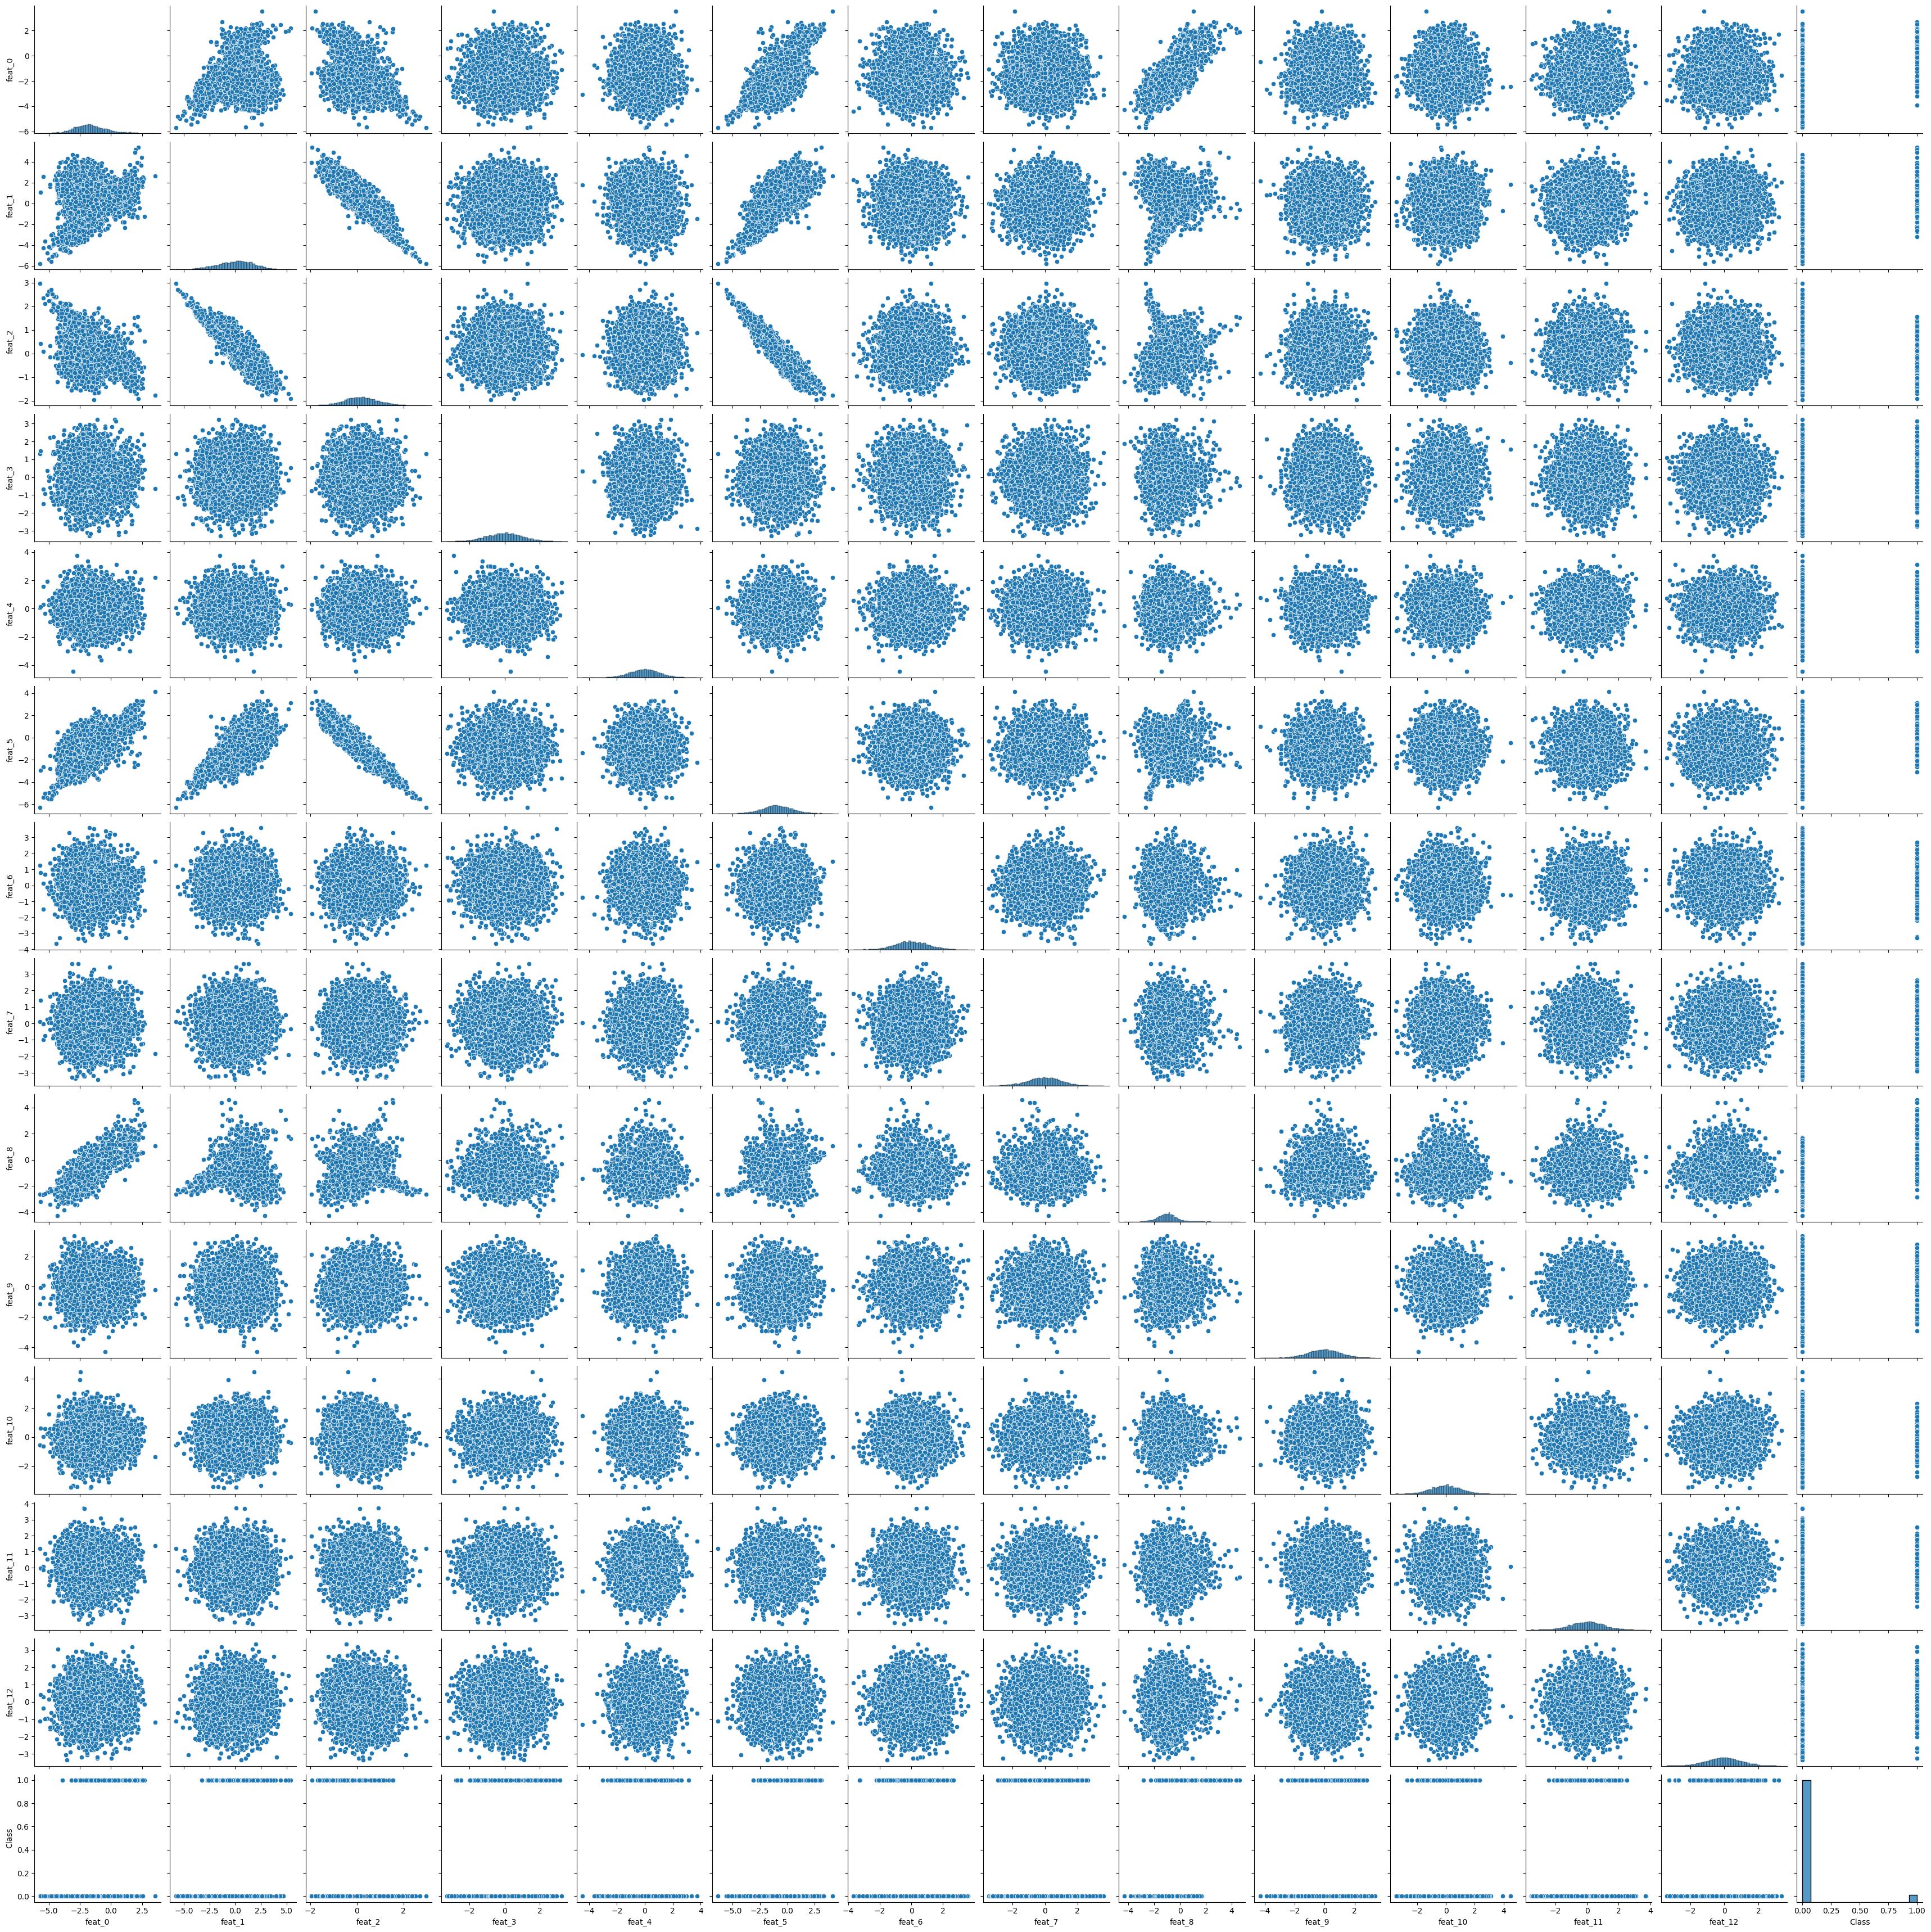

In [5]:
# prompt: scatter plot for all features

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded from the previous code block

# Select only numeric features for the scatter plot matrix
numeric_features = df.select_dtypes(include=['number'])

# Create the scatter plot matrix using seaborn's pairplot
sns.pairplot(numeric_features)
plt.show()


In [8]:
# prompt: logistic regression and random forest model without any class rebalancing:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is already loaded and preprocessed (if necessary)

# Define features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Replace 'isFraud' with your actual target column name
y = df['Class']

# Convert non-numeric columns to numeric using one-hot encoding or label encoding if needed
# ... (add your preprocessing steps here if necessary) ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed


# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression:")
print(classification_report(y_test, logreg_predictions))
print(confusion_matrix(y_test, logreg_predictions))


# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


# Evaluate the Random Forest model
print("\nRandom Forest:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

# Interpretation:
# The classification reports provide precision, recall, F1-score, and support for each class.
# Precision: Out of all the instances predicted as positive, what proportion was actually positive.
# Recall: Out of all the actual positive instances, what proportion was correctly predicted as positive.
# F1-score:  The harmonic mean of precision and recall.
# Support: The number of actual occurrences of the class in the specified dataset.
#
# The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives.
# Analyze these metrics to understand the model's performance for each class (fraudulent and non-fraudulent).
# If one class is significantly under-represented, the metrics might be misleading, so class imbalance could be addressed in later models.


Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       937
           1       0.95      0.56      0.70        63

    accuracy                           0.97      1000
   macro avg       0.96      0.78      0.84      1000
weighted avg       0.97      0.97      0.97      1000

[[935   2]
 [ 28  35]]

Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       937
           1       0.97      0.60      0.75        63

    accuracy                           0.97      1000
   macro avg       0.97      0.80      0.87      1000
weighted avg       0.97      0.97      0.97      1000

[[936   1]
 [ 25  38]]


In [9]:
# prompt: To handle the imbalance, apply all of the following techniques:Random under-sampling of majority class.
# Random over-sampling of minority class.
# SMOTE
# Tomek links

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

# ... (your existing code) ...

# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Apply Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Apply SMOTE and Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Train and evaluate models with balanced data
# Example with Logistic Regression and SMOTE data:
logreg_smote_model = LogisticRegression(max_iter=1000)
logreg_smote_model.fit(X_smote, y_smote)
logreg_smote_predictions = logreg_smote_model.predict(X_test)

print("\nLogistic Regression with SMOTE:")
print(classification_report(y_test, logreg_smote_predictions))
print(confusion_matrix(y_test, logreg_smote_predictions))

# Repeat the process for other sampling techniques and models
# ... (similar code blocks for other resampled datasets) ...



Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       937
           1       0.31      0.78      0.44        63

    accuracy                           0.88      1000
   macro avg       0.65      0.83      0.69      1000
weighted avg       0.94      0.88      0.90      1000

[[827 110]
 [ 14  49]]


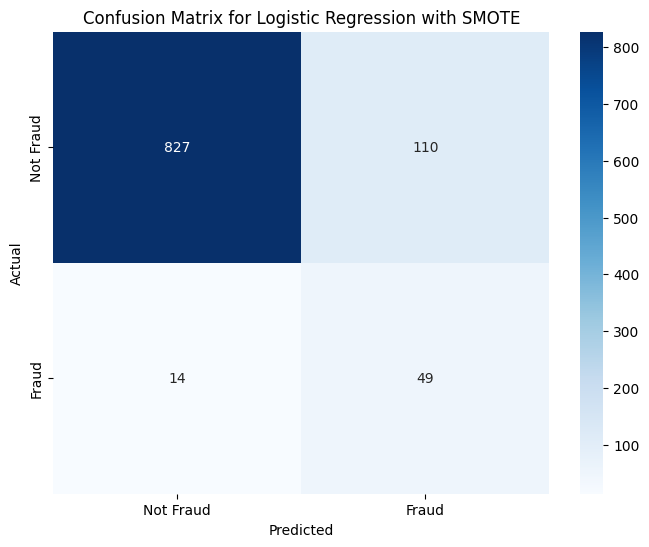

In [10]:
# prompt: visualize logreg_smote_predictions

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming logreg_smote_predictions is already calculated from the previous code block

# Visualize the confusion matrix
cm = confusion_matrix(y_test, logreg_smote_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with SMOTE')
plt.show()
